### Autoencoders:

1. Autoencoders are artificial neural networks capable of learning dense
representations of the input data, called latent representations or codings,
without any supervision (i.e., the training set is unlabeled).

2. These codings
typically have a much lower dimensionality than the input data, making
autoencoders useful for dimensionality reduction, especially for visualization purposes.

3. Autoencoders also act as feature detectors, and
they can be used for unsupervised pretraining of deep neural networks.

4. some autoencoders are generative
models: they are capable of randomly generating new data that looks very
similar to the training data. For example, you could train an autoencoder on
pictures of faces, and it would then be able to generate new faces.

5. the codings are byproducts of the
autoencoder learning the identity function under some constraints


### Generative adversarial networks (GANs)

1.  neural nets capable of
generating data. In fact, they can generate pictures of faces so convincing
that it is hard to believe the people they represent do not exist.

2. GANs are composed of two neural networks: a generator that tries to
generate data that looks similar to the training data, and a
discriminator that tries to tell real data from fake data.

### diffusion models

1. generate more diverse and higher-quality images
than GANs, while also being much easier to train. However, diffusion
models are much slower to run.

2. A denoising diffusion probabilistic model (DDPM) is trained to
remove a tiny bit of noise from an image. If you then take an image
entirely full of Gaussian noise and repeatedly run the diffusion model
on that image, a high-quality image will gradually emerge, similar to
the training images (but not identical).
 


### Efficient Data Representation

1. The outputs are often called the reconstructions because the autoencoder
tries to reconstruct the inputs. The cost function contains a reconstruction
loss that penalizes the model when the reconstructions are different from
the inputs.

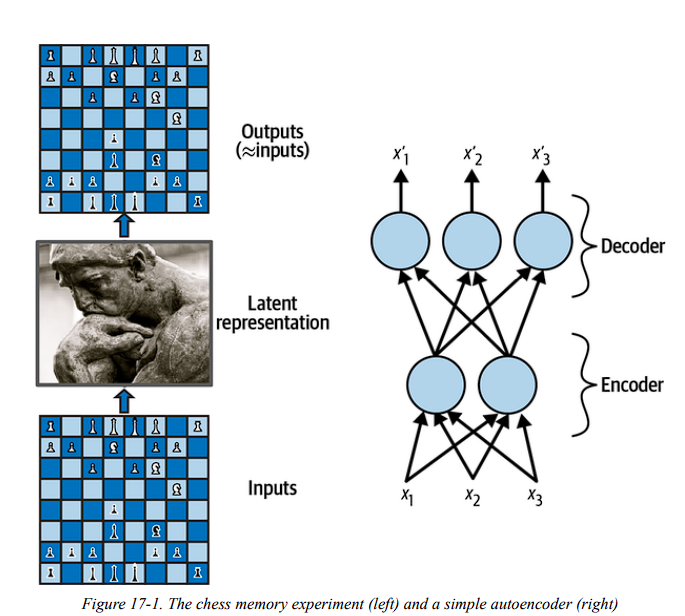

2. Because the internal representation has a lower dimensionality than the
input data (it is 2D instead of 3D), the autoencoder is said to be
undercomplete. An undercomplete autoencoder cannot trivially copy its
inputs to the codings, yet it must find a way to output a copy of its inputs. It
is forced to learn the most important features in the input data (and drop the
unimportant ones).

### Performing PCA with an Undercomplete Linear Autoencoder


1. If the autoencoder uses only linear activations and the cost function is the
mean squared error (MSE), then it ends up performing principal component
analysis

In [ ]:
"""To perform PCA, we do not use any activation function (i.e., all
neurons are linear), and the cost function is the MSE. That’s because
PCA is a linear transformation"""

import tensorflow as tf

encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(2)
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3) #The autoencoder’s number of outputs is equal to the number of inputs
])

autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse",optimizer=optimizer)


Now let’s train the model on the same simple generated 3D dataset we used
in Chapter 8 and use it to encode that dataset (i.e., project it to 2D):

In [2]:
import numpy as np

# Generate a 3D dataset
np.random.seed(42)
m = 100
w1, w2, w3 = 0.1, 0.3, 0.5
noise = 0.1

X_train = np.empty((m, 3))
for i in range(m):
    X_train[i, 0] = np.random.rand()
    X_train[i, 1] = w1 * X_train[i, 0] + np.random.rand() / 10
    X_train[i, 2] = w2 * X_train[i, 0] + w3 * X_train[i, 1] + noise * np.random.randn()

print(X_train)

[[ 0.37454012  0.13252544  0.24339361]
 [ 0.15601864  0.03120132  0.21470924]
 [ 0.05808361  0.09242598  0.22155935]
 [ 0.02058449  0.09904943  0.13244354]
 [ 0.83244264  0.10447818  0.25563011]
 [ 0.30424224  0.08289987  0.08614963]
 [ 0.43194502  0.07231742  0.0644591 ]
 [ 0.29214465  0.06585065  0.15199345]
 [ 0.45606998  0.12412459  0.20563611]
 [ 0.59241457  0.0638865   0.0671928 ]
 [ 0.60754485  0.0778069   0.16110304]
 [ 0.68423303  0.11243855  0.23231981]
 [ 0.12203823  0.06172151  0.14972672]
 [ 0.31171108  0.08317791  0.01301791]
 [ 0.54671028  0.07315647  0.27443798]
 [ 0.0884925   0.02844754  0.05790835]
 [ 0.04522729  0.03705576 -0.11575613]
 [ 0.82873751  0.11854908  0.23591137]
 [ 0.28093451  0.08236306  0.15787028]
 [ 0.07455064  0.10614376  0.03692884]
 [ 0.77224477  0.09709605  0.38332141]
 [ 0.77127035  0.0845315   0.36677487]
 [ 0.35846573  0.04743348  0.1643828 ]
 [ 0.33089802  0.03944564  0.21654674]
 [ 0.31098232  0.06361656  0.20635556]
 [ 0.88721274  0.13594277

In [3]:
history = autoencoder.fit(X_train,X_train,
                          epochs=500,
                          verbose=False)
codings = encoder.predict(X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


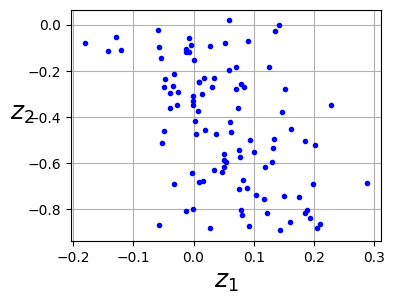

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

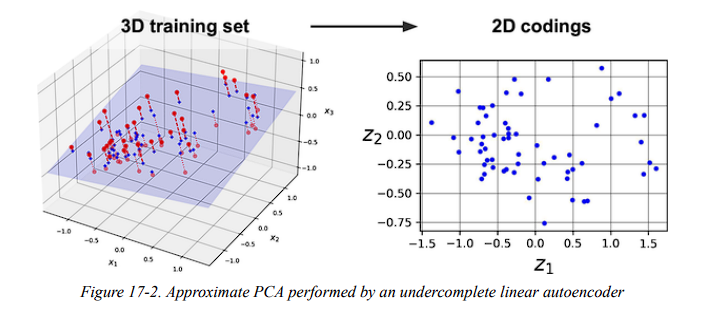

>NOTE
You can think of an autoencoder as performing a form of self-supervised learning, since
it is based on a supervised learning technique with automatically generated labels (in
this case simply equal to the inputs).


### Stacked Autoencoders or Deep autoencoders

1.  one must be careful not to make the
autoencoder too powerful. Imagine an encoder so powerful that it just
learns to map each input to a single arbitrary number (and the decoder
learns the reverse mapping). Obviously such an autoencoder will
reconstruct the training data perfectly, but it will not have learned any
useful data representation in the process, and it is unlikely to generalize
well to new instances.


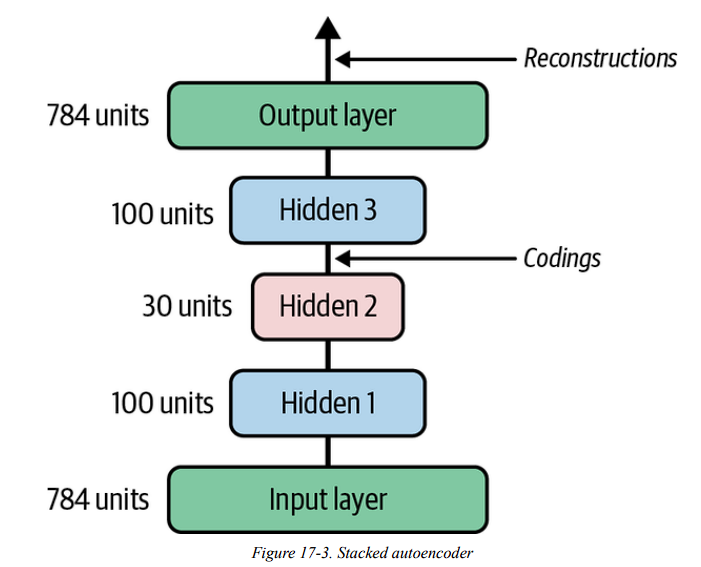

2. Implementation



In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train,X_valid = X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid = y_train_full[:-5000],y_train_full[-5000:]


In [9]:
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
])

stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28,28])
])

stacked_ae = tf.keras.Sequential([
    stacked_encoder,
    stacked_decoder
])

stacked_ae.compile(loss="mse",optimizer="nadam")
history = stacked_ae.fit(X_train, X_train,
                         epochs=20,
                         validation_data=(X_valid,X_valid))


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0341 - val_loss: 0.0175
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0169 - val_loss: 0.0162
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0155 - val_loss: 0.0153
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0149 - val_loss: 0.0147
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0138 - val_loss: 0.0138
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0134 - val_loss: 0.0135
Epoch 12/20
1719/1719 ━━━━━━━━

Explanation of CODE:

* The encoder takes 28 × 28–pixel grayscale images, flattens them so
that each image is represented as a vector of size 784, then processes
these vectors through two Dense layers of diminishing sizes (100 units
then 30 units), both using the ReLU activation function. For each input
image, the encoder outputs a vector of size 30.

* The decoder takes codings of size 30 (output by the encoder) and
processes them through two Dense layers of increasing sizes (100 units
then 784 units), and it reshapes the final vectors into 28 × 28 arrays so
the decoder’s outputs have the same shape as the encoder’s inputs.



### Visualizing the Reconstructions

1. One way to ensure that an autoencoder is properly trained is to compare the
inputs and the outputs: the differences should not be too significant.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


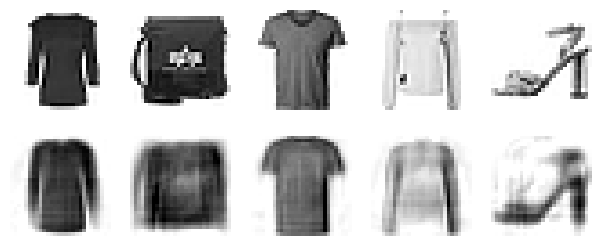

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def plot_reconstructions(model,images=X_valid,n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]),0,1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2,n_images, 1+ image_index)
        plt.imshow(images[image_index],cmap="binary")
        plt.axis("off")
        plt.subplot(2,n_images,1+n_images + image_index)
        plt.imshow(reconstructions[image_index],cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
plt.show()

The reconstructions look fuzzy, but remember that the images were compressed down to just 30 numbers, instead of 784.

### Visualizing the Fashion MNIST Dataset

1. For visualization, this does not give great results
compared to other dimensionality reduction algorithms,  but one big advantage of autoencoders is that they
can handle large datasets with many instances and many features.

2. one
strategy is to use an autoencoder to reduce the dimensionality down to a
reasonable level, then use another dimensionality reduction algorithm for
visualization

In [11]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE(init="pca",learning_rate="auto",random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


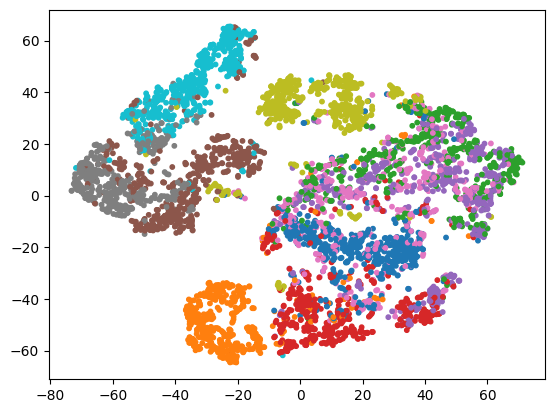

In [12]:
plt.scatter(X_valid_2D[:,0],X_valid_2D[:,1],c=y_valid,
            s=10, cmap="tab10")
plt.show()

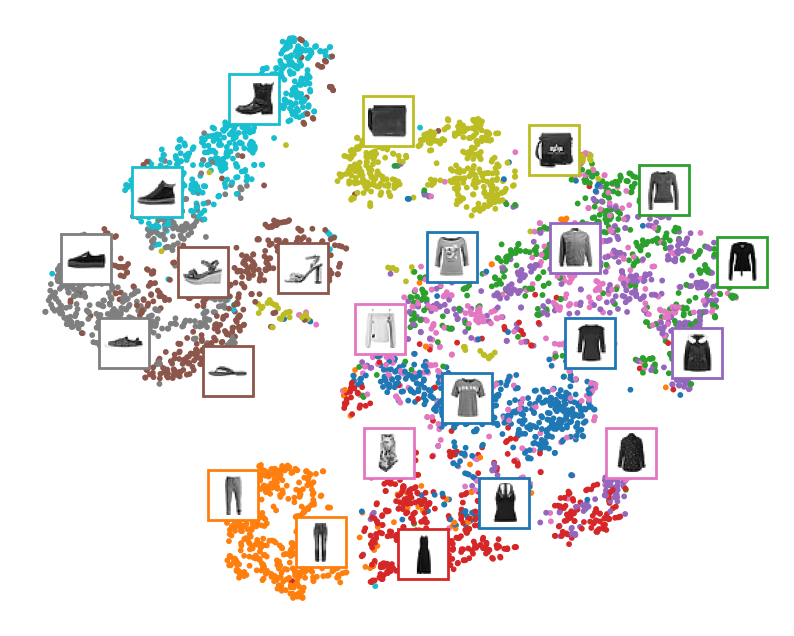

In [13]:
# extra code – beautifies the previous diagram for the book

import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")
plt.show()

### Unsupervised Pretraining Using Stacked Autoencoders

1.  if you have a large dataset but most of it is unlabeled, you can
first train a stacked autoencoder using all the data, then reuse the lower
layers to create a neural network for your actual task and train it using the
labeled data. you may want to freeze the pretrained layers (at least the
lower ones).

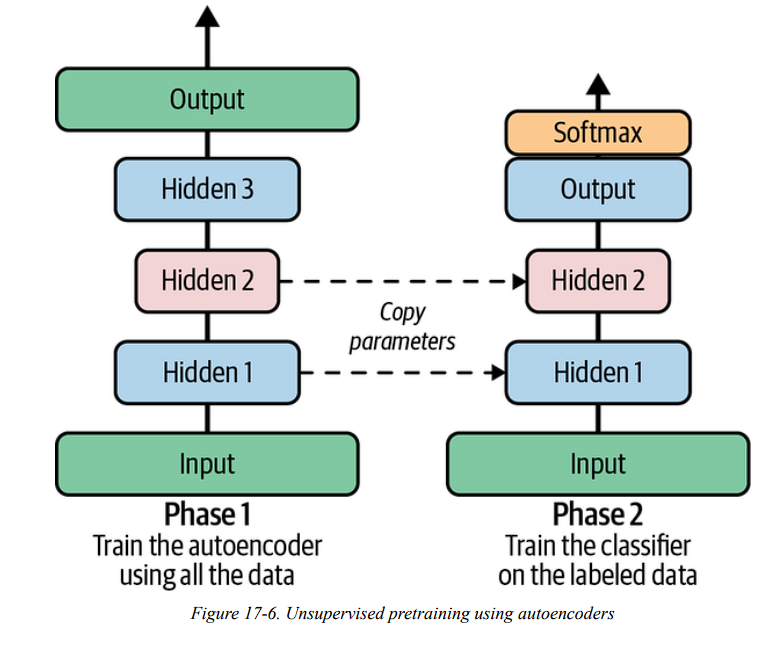






### Tying Weights

1. When an autoencoder is neatly symmetrical, like the one we just built, a
common technique is to tie the weights of the decoder layers to the weights
of the encoder layers. This halves the number of weights in the model,
speeding up training and limiting the risk of overfitting.

2. Specifically, if the
autoencoder has a total of N layers (not counting the input layer), and W_L
represents the connection weights of the Lth layer (e.g., layer 1 is the first
hidden layer, layer N/2 is the coding layer, and layer N is the output layer),
then the decoder layer weights can be defined as W_L = W_(N-L+1) (with L = N
/ 2 + 1, …, N).


In [14]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self,dense,activation=None,**kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation=tf.keras.activations.get(activation)

    def build(self,batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=self.dense.input_shape[-1],
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self,inputs):
        Z = tf.matmul(inputs,self.dense.weigths[0],transpose_b=True)
        return self.activation(Z + self.biases)
    

* This custom layer acts like a regular Dense layer, but it uses another Dense
layer’s weights, transposed (setting transpose_b=True is equivalent to
transposing the second argument, but it’s more efficient as it performs the
transposition on the fly within the matmul() operation).

* However, it uses its
own bias vector. Now we can build a new stacked autoencoder, much like
the previous one but with the decoder’s Dense layers tied to the encoder’s
Dense layers:


In [15]:
dense_1 = tf.keras.layers.Dense(100,activation="relu")
dense_2 = tf.keras.layers.Dense(30,activation="relu")

tied_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    dense_1,
    dense_2
])

tied_decoder = tf.keras.Sequential([
    DenseTranspose(dense_2,activation="relu"),
    DenseTranspose(dense_1),
    tf.keras.layers.Reshape([28,28])
])

tied_ae = tf.keras.Sequential([
    tied_encoder,
    tied_decoder
])



This model achieves roughly the same reconstruction error as the previous
model, using almost half the number of parameters.

### Training One Autoencoder at a Time

1. Rather than training the whole stacked autoencoder in one go like we just
did, it is possible to train one shallow autoencoder at a time, then stack all
of them into a single stacked autoencoder.

2. This technique is not used so much these days, but you may
still run into papers that talk about “greedy layerwise training”, so it’s good
to know what it means.

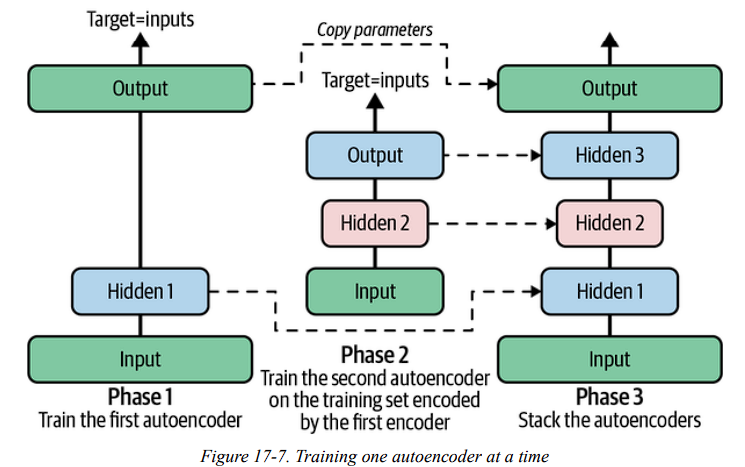



In [16]:
def train_autoencoder(n_neurons, X_train, X_valid, n_epochs=10,
                      output_activation=None, learning_rate=1e-3):
    n_inputs = X_train.shape[-1]
    encoder = tf.keras.layers.Dense(n_neurons, activation="relu")
    decoder = tf.keras.layers.Dense(n_inputs, activation=output_activation)
    autoencoder = tf.keras.Sequential([encoder, decoder])
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    autoencoder.compile(loss="mse", optimizer=optimizer)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [17]:
tf.random.set_seed(42)

X_train_flat = tf.keras.layers.Flatten()(X_train)
X_valid_flat = tf.keras.layers.Flatten()(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, learning_rate=5e-4)
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, output_activation="relu",
    learning_rate=5e-3)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0382 - val_loss: 0.0129
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1110 - val_loss: 0.0719
Epoch 2/10
1719/1719 ━━━━━━━━━━

In [18]:
stacked_ae_1_by_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    enc1, enc2, dec2, dec1,
    tf.keras.layers.Reshape([28, 28])
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


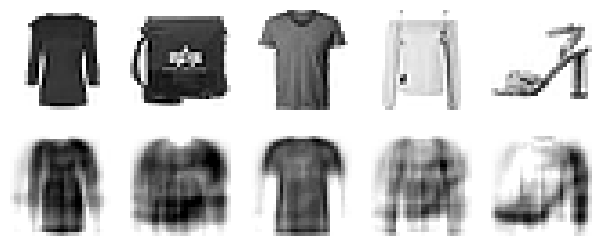

In [19]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

In [20]:
stacked_ae_1_by_1.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=5,
                                validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0194 - val_loss: 0.0174
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0169 - val_loss: 0.0159
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0145 - val_loss: 0.0144


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


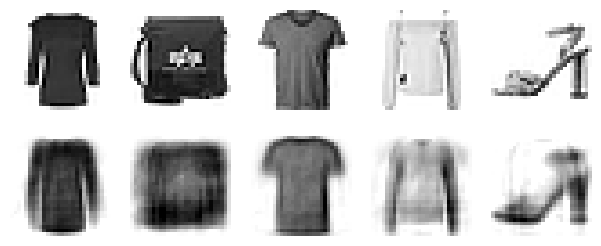

In [21]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

### Convolutional Autoencoders

1. The encoder is a
regular CNN composed of convolutional layers and pooling layers. It
typically reduces the spatial dimensionality of the inputs (i.e., height and
width) while increasing the depth (i.e., the number of feature maps). The
decoder must do the reverse (upscale the image and reduce its depth back to
the original dimensions), and for this you can use transpose convolutional
layers (alternatively, you could combine upsampling layers with
convolutional layers).


In [30]:
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28,28,1]),
    tf.keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # output: 14 x  14 x 16
    tf.keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # op: 7 x 7 x 32
    tf.keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2), # op: 3 x 3 x 64
    tf.keras.layers.Conv2D(30,3,padding="same",activation="relu"),
    tf.keras.layers.GlobalAvgPool2D() #op : 30
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3,3,16)),
    tf.keras.layers.Conv2DTranspose(32,3,strides=2,activation="relu"),
    tf.keras.layers.Conv2DTranspose(16,3,strides=2,padding="same",activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28,28])
])

conv_ae = tf.keras.Sequential([
    conv_encoder,
    conv_decoder
])

In [31]:
# extra code – compiles and fits the model
conv_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = conv_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0462 - val_loss: 0.0205
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0191 - val_loss: 0.0173
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0129 - val_loss: 0.0130
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0123 - val_loss: 0.0126


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


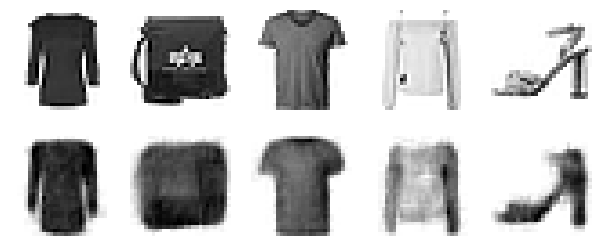

In [32]:
# extra code – shows the reconstructions
plot_reconstructions(conv_ae)
plt.show()

It’s also possible to create autoencoders with other architecture types, such
as RNNs

In [33]:
tf.random.set_seed(42)

recurrent_encoder = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(30)
])
recurrent_decoder = tf.keras.Sequential([
    tf.keras.layers.RepeatVector(28),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dense(28)
])
recurrent_ae = tf.keras.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())

In [34]:
history = recurrent_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - loss: 0.0365 - val_loss: 0.0193
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - loss: 0.0183 - val_loss: 0.0164
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - loss: 0.0157 - val_loss: 0.0146
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - loss: 0.0142 - val_loss: 0.0135
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - loss: 0.0124 - val_loss: 0.0126
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - loss: 0.0107 - val_loss: 0.0105


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


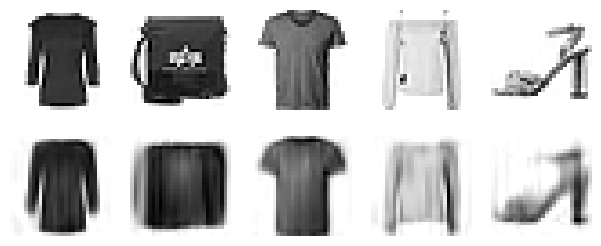

In [35]:
plot_reconstructions(recurrent_ae)
plt.show()

### Denoising AutoEncoders

1. Another way to force the autoencoder to learn useful features is to add noise
to its inputs, training it to recover the original, noise-free inputs.

2. The noise can be pure Gaussian noise added to the inputs, or it can be
randomly switched-off inputs, just like in dropout.

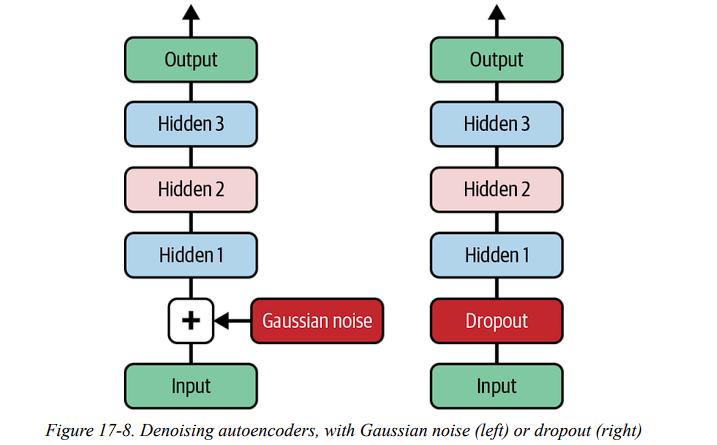

In [36]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])
dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])

# extra code – compiles and fits the model
dropout_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0410 - val_loss: 0.0223
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0231 - val_loss: 0.0205
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0217 - val_loss: 0.0197
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0209 - val_loss: 0.0190
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0203 - val_loss: 0.0186
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0199 - val_loss: 0.0183
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0196 - val_loss: 0.0182
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0194 - val_loss: 0.0180
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0192 - val_loss: 0.0176
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0191 - val_loss: 0.0176


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


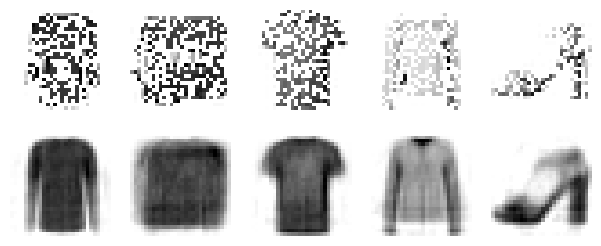

In [37]:
# extra code – this cell generates and saves Figure 17–9
tf.random.set_seed(42)
dropout = tf.keras.layers.Dropout(0.5)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True))
plt.show()

Figure 17-9 shows a few noisy images (with half the pixels turned off), and
the images reconstructed by the dropout-based denoising autoencoder.
Notice how the autoencoder guesses details that are actually not in the
input, such as the top of the white shirt (bottom row, fourth image). As you
can see, not only can denoising autoencoders be used for data visualization
or unsupervised pretraining, like the other autoencoders we’ve discussed so
far, but they can also be used quite simply and efficiently to remove noise
from images.

### Sparse Autoencoders

1. Another kind of constraint that often leads to good feature extraction is
sparsity: by adding an appropriate term to the cost function, the
autoencoder is pushed to reduce the number of active neurons in the coding
layer.

2. For example, it may be pushed to have on average only 5%
significantly active neurons in the coding layer. This forces the autoencoder
to represent each input as a combination of a small number of activations.
As a result, each neuron in the coding layer typically ends up representing a
useful feature.

3. A simple approach is to use the sigmoid activation function in the coding
layer (to constrain the codings to values between 0 and 1), use a large
coding layer (e.g., with 300 units), and add some ℓ regularization to the
coding layer’s activations.

In [38]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

sparse_l1_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-4)
])
sparse_l1_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_l1_ae = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])

# extra code – compiles and fits the model
sparse_l1_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0807 - val_loss: 0.0316
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0293 - val_loss: 0.0273
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0261 - val_loss: 0.0246
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0240 - val_loss: 0.0231
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0225 - val_loss: 0.0218
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0215 - val_loss: 0.0210
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0207 - val_loss: 0.0203
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0201 - val_loss: 0.0200
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0196 - val_loss: 0.0199
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0192 - val_loss: 0.0193


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


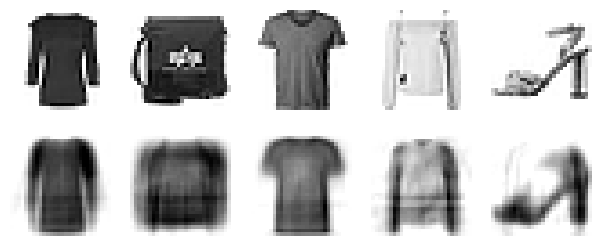

In [39]:
# extra code – shows the reconstructions
plot_reconstructions(sparse_l1_ae)
plt.show()

* This ActivityRegularization layer just returns its inputs, but as a side
effect it adds a training loss equal to the sum of the absolute values of its
inputs. This only affects training. Equivalently, you could remove the
ActivityRegularization layer and set
activity_regularizer=tf.keras.regularizers.l1(1e-4) in the
previous layer.

4. This penalty will encourage the neural network to produce
codings close to 0, but since it will also be penalized if it does not
reconstruct the inputs correctly, it will have to output at least a few nonzero
values. Using the ℓ_1 norm rather than the ℓ_2 norm will push the neural
network to preserve the most important codings while eliminating the ones
that are not needed for the input image (rather than just reducing all
codings).

5. Another approach, which often yields better results, is to measure the actual
sparsity of the coding layer at each training iteration, and penalize the
model when the measured sparsity differs from a target sparsity. We do so
by computing the average activation of each neuron in the coding layer,
over the whole training batch. The batch size must not be too small, or else
the mean will not be accurate.

* Once we have the mean activation per neuron, we want to penalize the
neurons that are too active, or not active enough, by adding a sparsity loss
to the cost function.

* For example, if we measure that a neuron has an
average activation of 0.3, but the target sparsity is 0.1, it must be penalized
to activate less. One approach could be simply adding the squared error (0.3
– 0.1) to the cost function, but in practice a better approach is to use the
Kullback–Leibler (KL) divergence which
has much stronger gradients than the mean squared error, as you can see below.


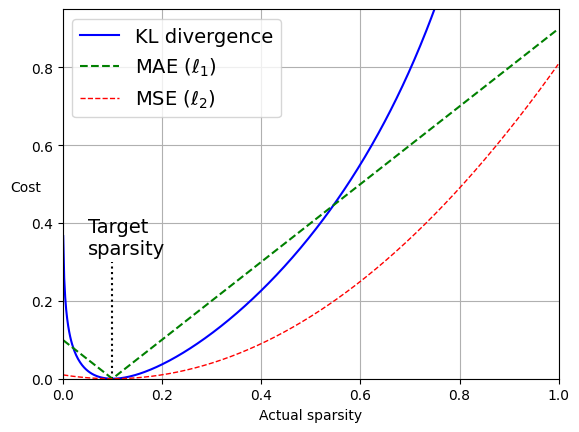

In [40]:
# extra code – this cell generates and saves Figure 17–10
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q) ** 2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
plt.grid(True)

* Given two discrete probability distributions P and Q, the KL divergence
between these distributions, noted D (P ∥ Q), can be computed using
Equation 17-1.

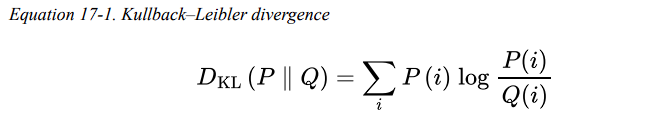

* In our case, we want to measure the divergence between the target
probability p that a neuron in the coding layer will activate and the actual
probability q, estimated by measuring the mean activation over the training
batch. So, the KL divergence simplifies to Equation 17-2.

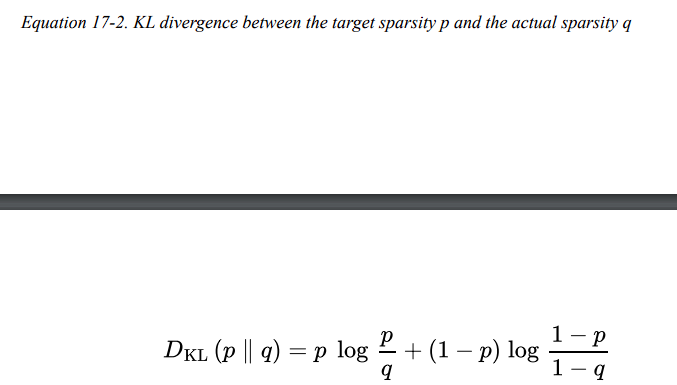

* Once we have computed the sparsity loss for each neuron in the coding
layer, we sum up these losses and add the result to the cost function. In
order to control the relative importance of the sparsity loss and the
reconstruction loss, we can multiply the sparsity loss by a sparsity weight
hyperparameter. If this weight is too high, the model will stick closely to the
target sparsity, but it may not reconstruct the inputs properly, making the
model useless. Conversely, if it is too low, the model will mostly ignore the
sparsity objective and will not learn any interesting features.

We now have all we need to implement a sparse autoencoder based on the
KL divergence. First, let’s create a custom regularizer to apply KL
divergence regularization:


In [41]:
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, weight, target):
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = tf.reduce_mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

Now we can build the sparse autoencoder, using the
KLDivergenceRegularizer for the coding layer’s activations:

In [42]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)
sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid",
                          activity_regularizer=kld_reg)
])
sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_kl_ae = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

# extra code – compiles and fits the model
sparse_kl_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0712 - val_loss: 0.0227
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0204 - val_loss: 0.0188
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0163 - val_loss: 0.0166
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0141 - val_loss: 0.0148
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0101 - val_loss: 0.0102


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


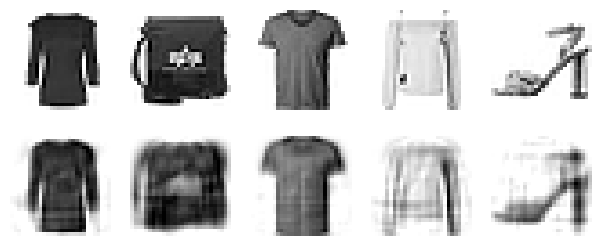

In [43]:
# extra code – shows the reconstructions
plot_reconstructions(sparse_kl_ae)
plt.show()

### Variational Autoencoders

1. VAEs are quite different from all the autoencoders we have discussed so far,
in these particular ways:

* They are probabilistic autoencoders, meaning that their outputs are
partly determined by chance, even after training (as opposed to
denoising autoencoders, which use randomness only during training).

* Most importantly, they are generative autoencoders, meaning that they
can generate new instances that look like they were sampled from the
training set.

2. Both these properties make VAEs rather similar to RBMs, but they are
easier to train, and the sampling process is much faster.

3. variational
autoencoders perform variational Bayesian inference, which is an efficient
way of carrying out approximate Bayesian inference.

4. The original distribution is
called the prior, while the updated distribution is called the posterior. In our
case, we want to find a good approximation of the data distribution. Once
we have that, we can sample from it.

5. You can recognize the basic structure of all autoencoders, with
an encoder followed by a decoder (in this example, they both have two
hidden layers), but there is a twist: instead of directly producing a coding
for a given input, the encoder produces a mean coding μ and a standard
deviation σ. The actual coding is then sampled randomly from a Gaussian
distribution with mean μ and standard deviation σ. After that the decoder
decodes the sampled coding normally. The right part of the diagram shows
a training instance going through this autoencoder. First, the encoder
produces μ and σ, then a coding is sampled randomly (notice that it is not
exactly located at μ), and finally this coding is decoded; the final output
resembles the training instance.

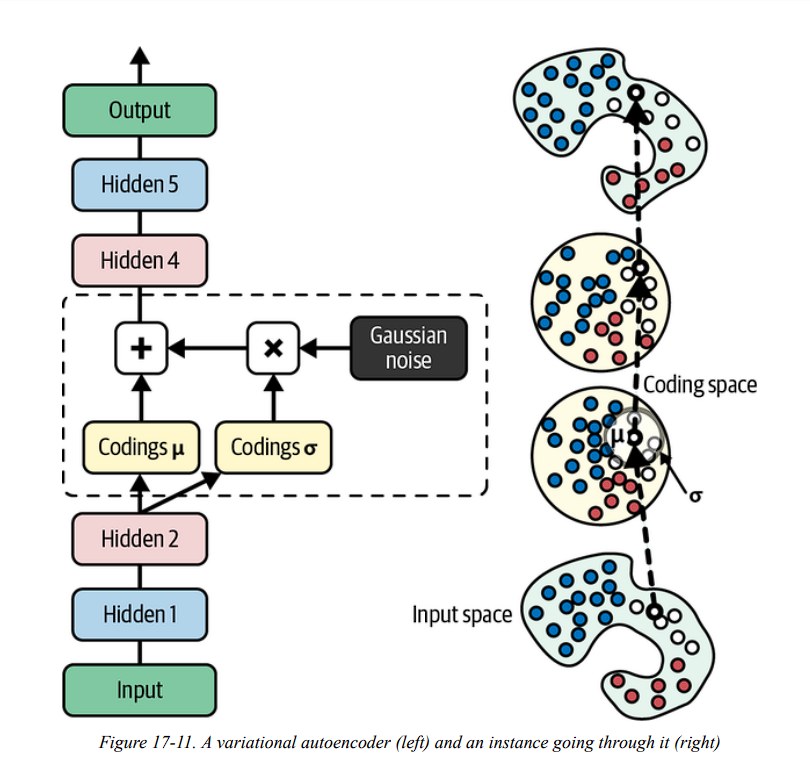

6. One great
consequence is that after training a variational autoencoder, you can very
easily generate a new instance: just sample a random coding from the
Gaussian distribution and decode it.

7. let’s look at the cost function

* It is composed of two parts. The first is
the usual reconstruction loss that pushes the autoencoder to reproduce its
inputs.

* The second is the
latent loss that pushes the autoencoder to have codings that look as though
they were sampled from a simple Gaussian distribution: it is the KL
divergence between the target distribution (i.e., the Gaussian distribution)
and the actual distribution of the codings.


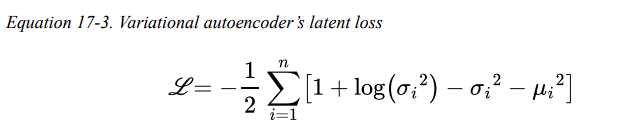

* In this equation, ℒ is the latent loss, n is the codings’ dimensionality, and μ_i
and σ_i are the mean and standard deviation of the ith component of the
codings. The vectors μ and σ (which contain all the μ_i and σ_i ) are output by
the encoder, as shown in Figure 17-11 (left).


* A common tweak to the variational autoencoder’s architecture is to make
the encoder output γ = log(σ^2 ) rather than σ. The latent loss can then be
computed as shown in Equation 17-4. This approach is more numerically
stable and speeds up training.

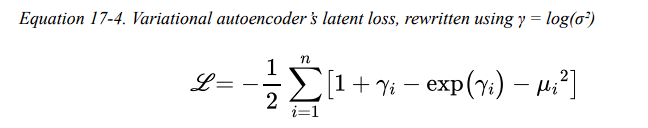

Let’s start building a variational autoencoder for Fashion MNIST (as shown
in Figure 17-11, but using the γ tweak). First, we will need a custom layer
to sample the codings, given μ and γ
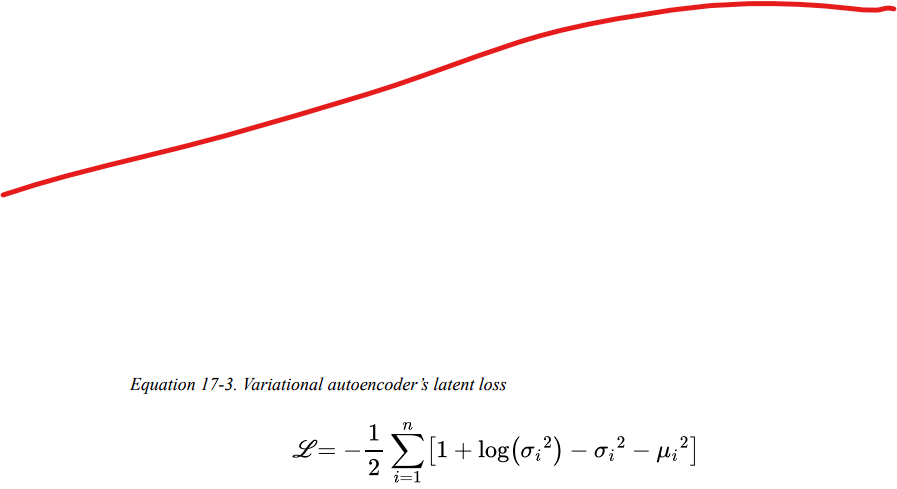

In [118]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean 

This Sampling layer takes two inputs: mean (μ) and log_var (γ). It uses the
function tf.random.normal() to sample a random vector (of the same
shape as γ) from the Gaussian distribution, with mean 0 and standard
deviation 1. Then it multiplies it by exp(γ / 2) (which is equal to σ, as you
can verify mathematically), and finally it adds μ and returns the result. This
samples a codings vector from the Gaussian distribution with mean μ and
standard deviation σ.

In [119]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

codings_size = 10

inputs = tf.keras.layers.Input(shape=[28, 28, 1])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])

variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

Note that the Dense layers that output codings_mean (μ) and
codings_log_var (γ) have the same inputs (i.e., the outputs of the second
Dense layer). We then pass both codings_mean and codings_log_var to
the Sampling layer. Finally, the variational_encoder model has three
outputs. Only the codings are required, but we add codings_mean and
codings_log_var as well, in case we want to inspect their values.

In [120]:
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

We ignore the first two outputs of the encoder (we only want to feed the
codings to the decoder). Lastly, we must add the latent loss and the
reconstruction loss:


In [121]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

We first apply Equation 17-4 to compute the latent loss for each instance in
the batch, summing over the last axis. Then we compute the mean loss over
all the instances in the batch, and we divide the result by 784 to ensure it
has the appropriate scale compared to the reconstruction loss. Indeed, the
variational autoencoder’s reconstruction loss is supposed to be the sum of
the pixel reconstruction errors, but when Keras computes the "mse" loss it
computes the mean over all 784 pixels, rather than the sum. So, the
reconstruction loss is 784 times smaller than we need it to be.

In [122]:
class LatentLossLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        latent_loss = -0.5 * tf.reduce_sum(
            1 + log_var - tf.exp(log_var) - tf.square(mean),
            axis=-1
        )
        self.add_loss(tf.reduce_mean(latent_loss) / 784.0)  # Normalize by 784 pixels
        return inputs

latent_loss_layer = LatentLossLayer()([codings_mean, codings_log_var])

In [123]:
variational_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid)) 


Epoch 1/25


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_315']
Received: inputs=Tensor(shape=(None, 28, 28, 1))
  warnings.warn(msg)
C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_322']
Received: inputs=Tensor(shape=(None, 10))
  warnings.warn(msg)


SystemError: D:\a\1\s\Objects\listobject.c:338: bad argument to internal function

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_315']
Received: inputs=Tensor(shape=(5, 28, 28))
  warnings.warn(msg)
C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_315']
Received: inputs=Tensor(shape=(5, 28, 28, 1))
  warnings.warn(msg)
C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_322']
Received: inputs=Ten

TypeError: Invalid shape (5, 28, 28) for image data

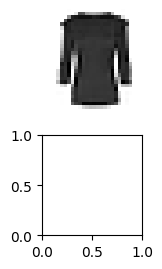

In [124]:
plot_reconstructions(variational_ae)
plt.show()

### Generating Fashion MNIST images

1. Now let’s use this variational autoencoder to generate images that look like
fashion items. All we need to do is sample random codings from a Gaussian
distribution and decode them:

In [86]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

codings = tf.random.normal(shape=[3 * 7, codings_size])
images = variational_decoder(codings).numpy()

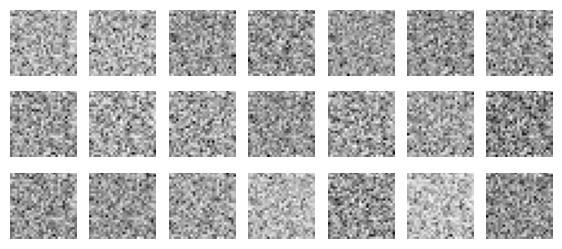

In [87]:
# extra code – this cells generates and saves Figure 17-12

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

plot_multiple_images(images, 7)
plt.show()

* Variational autoencoders make it possible to perform semantic
interpolation: instead of interpolating between two images at the pixel
level, which would look as if the two images were just overlaid, we can
interpolate at the codings level.

* . For example, let’s take a few codings along
an arbitrary line in latent space and decode them. We get a sequence of
images that gradually go from pants to sweaters.


In [88]:
codings = np.zeroes([7,codings_size])
codings[:,3] = np.linspace(-0.8,0.8,7) # axis 3 looks best in this case
images = variational_decoder(codings).numpy()

AttributeError: module 'numpy' has no attribute 'zeroes'

In [ ]:
# extra code – this cell generates and saves Figure 17–13
plot_multiple_images(images)
plt.show()

### Generative Adversarial Networks

1. As shown in Figure 17-14, a GAN is composed of two
neural networks:

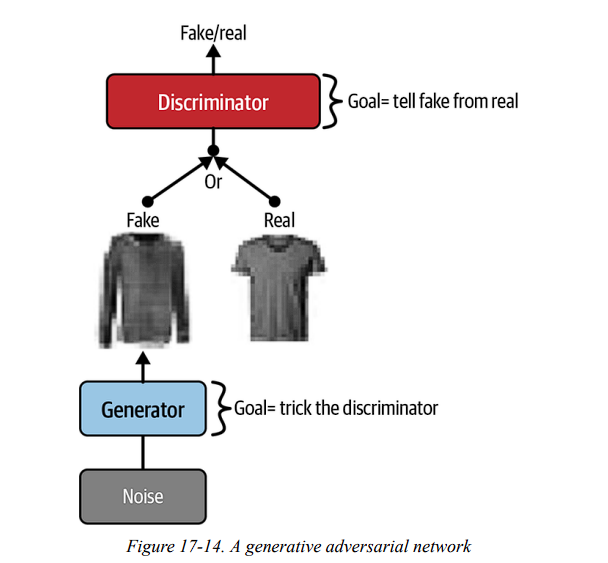

* Generator: Takes a random distribution as input (typically Gaussian) and outputs
some data—typically, an image. You can think of the random inputs as
the latent representations (i.e., codings) of the image to be generated. So, as you can see, the generator offers the same functionality as a
decoder in a variational autoencoder, and it can be used in the same way
to generate new images: just feed it some Gaussian noise, and it outputs
a brand-new image. However, it is trained very differently, as you will
soon see.

* Discriminator: Takes either a fake image from the generator or a real image from the
training set as input, and must guess whether the input image is fake or real.

2. During training, the generator and the discriminator have opposite goals:
the discriminator tries to tell fake images from real images, while the
generator tries to produce images that look real enough to trick the
discriminator. Because the GAN is composed of two networks with
different objectives, it cannot be trained like a regular neural network. Each
training iteration is divided into two phases:

* In the first phase, we train the discriminator. A batch of real images is
sampled from the training set and is completed with an equal number
of fake images produced by the generator. The labels are set to 0 for
fake images and 1 for real images, and the discriminator is trained on
this labeled batch for one step, using the binary cross-entropy loss.
Importantly, backpropagation only optimizes the weights of the
discriminator during this phase.

* In the second phase, we train the generator. We first use it to produce
another batch of fake images, and once again the discriminator is used
to tell whether the images are fake or real. This time we do not add
real images in the batch, and all the labels are set to 1 (real): in other
words, we want the generator to produce images that the discriminator
will (wrongly) believe to be real! Crucially, the weights of the
discriminator are frozen during this step, so backpropagation only
affects the weights of the generator.

>NOTE
The generator never actually sees any real images, yet it gradually learns to produce
convincing fake images! All it gets is the gradients flowing back through the
discriminator. Fortunately, the better the discriminator gets, the more information about
the real images is contained in these secondhand gradients, so the generator can make
significant progress.

3. First, we need to build the generator and the discriminator:

* The generator is
similar to an autoencoder’s decoder, and the discriminator is a regular
binary classifier: it takes an image as input and ends with a Dense layer
containing a single unit and using the sigmoid activation function. For the
second phase of each training iteration, we also need the full GAN model
containing the generator followed by the discriminator:





In [ ]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

codings_size = 30

Dense = tf.keras.layers.Dense
generator = tf.keras.Sequential([
    Dense(100, activation="relu", kernel_initializer="he_normal"),
    Dense(150, activation="relu", kernel_initializer="he_normal"),
    Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    Dense(150, activation="relu", kernel_initializer="he_normal"),
    Dense(100, activation="relu", kernel_initializer="he_normal"),
    Dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])

4. Next, we need to compile these models. As the discriminator is a binary
classifier, we can naturally use the binary cross-entropy loss. The gan
model is also a binary classifier, so it can use the binary cross-entropy loss
as well.

* However, the generator will only be trained through the gan model,
so we do not need to compile it at all. Importantly, the discriminator should
not be trained during the second phase, so we make it non-trainable before
compiling the gan model:


In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

>NOTE
The trainable attribute is taken into account by Keras only when compiling a model,
so after running this code, the discriminator is trainable if we call its fit() method
or its train_on_batch() method (which we will be using), while it is not trainable
when we call these methods on the gan model.

* Since the training loop is unusual, we cannot use the regular fit() method.
Instead, we will write a custom training loop. For this, we first need to
create a Dataset to iterate through the images




In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

We are now ready to write the training loop. Let’s wrap it in a train_gan()
function:

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")  # extra code
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            gan.train_on_batch(noise, y2)
        # extra code — plot images during training
        plot_multiple_images(generated_images.numpy(), 8)
        plt.show()

train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)

5. you can see the two phases at each iteration:

* In phase one we feed Gaussian noise to the generator to produce fake
images, and we complete this batch by concatenating an equal number
of real images. The targets y1 are set to 0 for fake images and 1 for
real images. Then we train the discriminator on this batch. Remember
that the discriminator is trainable in this phase, but we are not touching
the generator.

* In phase two, we feed the GAN some Gaussian noise. Its generator
will start by producing fake images, then the discriminator will try to
guess whether these images are fake or real. In this phase, we are
trying to improve the generator, which means that we want the
discriminator to fail: this is why the targets y2 are all set to 1, although
the images are fake. In this phase, the discriminator is not trainable, so
the only part of the gan model that will improve is the generator.

That’s it! After training, you can randomly sample some codings from a
Gaussian distribution, and feed them to the generator to produce new
images:

In [ ]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

codings = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(codings)

In [ ]:
# extra code – this cell generates and saves Figure 17–15
plot_multiple_images(generated_images, 8)
plt.show()

### The Difficulties of Training GANs

1. During training, the generator and the discriminator constantly try to
outsmart each other, in a zero-sum game. As training advances, the game
may end up in a state that game theorists call a Nash equilibrium, named
after the mathematician John Nash: this is when no player would be better
off changing their own strategy, assuming the other players do not change
theirs.

2. For example, a Nash equilibrium is reached when everyone drives on
the left side of the road: no driver would be better off being the only one to
switch sides. Of course, there is a second possible Nash equilibrium: when
everyone drives on the right side of the road. Different initial states and
dynamics may lead to one equilibrium or the other. In this example, there is
a single optimal strategy once an equilibrium is reached (i.e., driving on the
same side as everyone else), but a Nash equilibrium can involve multiple
competing strategies (e.g., a predator chases its prey, the prey tries to
escape, and neither would be better off changing their strategy).


3. So how does this apply to GANs? Well, the authors of the GAN paper
demonstrated that a GAN can only reach a single Nash equilibrium: that’s
when the generator produces perfectly realistic images, and the
discriminator is forced to guess (50% real, 50% fake). This fact is very
encouraging: it would seem that you just need to train the GAN for long
enough, and it will eventually reach this equilibrium, giving you a perfect
generator. Unfortunately, it’s not that simple: nothing guarantees that the
equilibrium will ever be reached.

4. The biggest difficulty is called mode collapse: this is when the generator’s
outputs gradually become less diverse. How can this happen? Suppose that
the generator gets better at producing convincing shoes than any other class.
It will fool the discriminator a bit more with shoes, and this will encourage
it to produce even more images of shoes. Gradually, it will forget how to
produce anything else. Meanwhile, the only fake images that the
discriminator will see will be shoes, so it will also forget how to
discriminate fake images of other classes. Eventually, when the
discriminator manages to discriminate the fake shoes from the real ones, the
generator will be forced to move to another class. It may then become good
at shirts, forgetting about shoes, and the discriminator will follow. The
GAN may gradually cycle across a few classes, never really becoming very
good at any of them.

5. Moreover, because the generator and the discriminator are constantly
pushing against each other, their parameters may end up oscillating and
becoming unstable. Training may begin properly, then suddenly diverge for
no apparent reason, due to these instabilities. And since many factors affect
these complex dynamics, GANs are very sensitive to the hyperparameters:
you may have to spend a lot of effort fine-tuning them. In fact, that’s why I
used RMSProp rather than Nadam when compiling the models: when using
Nadam, I ran into a severe mode collapse.

6.  For
example, a popular technique called experience replay consists of storing
the images produced by the generator at each iteration in a replay buffer
(gradually dropping older generated images) and training the discriminator
using real images plus fake images drawn from this buffer (rather than just
fake images produced by the current generator). This reduces the chances
that the discriminator will overfit the latest generator’s outputs. Another
common technique is called mini-batch discrimination: it measures how
similar images are across the batch and provides this statistic to the
discriminator, so it can easily reject a whole batch of fake images that lack
diversity. This encourages the generator to produce a greater variety of
images, reducing the chance of mode collapse. Other papers simply propose
specific architectures that happen to perform well.

7. In short, this is still a very active field of research, and the dynamics of
GANs are still not perfectly understood. But the good news is that great
progress has been made, and some of the results are truly astounding! So
let’s look at some of the most successful architectures, starting with deep
convolutional GANs, which were the state of the art just a few years ago.
Then we will look at two more recent (and more complex) architectures.





### Deep Convolutional GANs

1. The authors of the original GAN paper experimented with convolutional
layers, but only tried to generate small images. Soon after, many researchers
tried to build GANs based on deeper convolutional nets for larger images.

2. They called their architecture [deep
convolutional GANs (DCGANs)](https://homl.info/dcgan). Here are the main guidelines they
proposed for building stable convolutional GANs:

* Replace any pooling layers with strided convolutions (in the
discriminator) and transposed convolutions (in the generator).

* Use batch normalization in both the generator and the discriminator,
except in the generator’s output layer and the discriminator’s input
layer.

* Remove fully connected hidden layers for deeper architectures

* Use ReLU activation in the generator for all layers except the output
layer, which should use tanh.

* Use leaky ReLU activation in the discriminator for all layers.

These guidelines will work in many cases, but not always, so you may still
need to experiment with different hyperparameters. In fact, just changing
the random seed and training the exact same model again will sometimes
work.


In [ ]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

codings_size = 100

generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7 * 7 * 128),
    tf.keras.layers.Reshape([7, 7, 128]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2,
                                    padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2,
                                    padding="same", activation="tanh"),
])
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])

In [ ]:
# extra code – compiles the discrimator and the gan, as earlier
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

The generator takes codings of size 100, projects them to 6,272 dimensions
(7 * 7 * 128), and reshapes the result to get a 7 × 7 × 128 tensor. This tensor
is batch normalized and fed to a transposed convolutional layer with a stride
of 2, which upsamples it from 7 × 7 to 14 × 14 and reduces its depth from
128 to 64. The result is batch normalized again and fed to another
transposed convolutional layer with a stride of 2, which upsamples it from
14 × 14 to 28 × 28 and reduces the depth from 64 to 1. This layer uses the
tanh activation function, so the outputs will range from –1 to 1. For this
reason, before training the GAN, we need to rescale the training set to that
same range. We also need to reshape it to add the channel dimension:

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

The discriminator looks much like a regular CNN for binary classification,
except instead of using max pooling layers to downsample the image, we
use strided convolutions (strides=2). Note that we use the leaky ReLU
activation function. Overall, we respected the DCGAN guidelines, except
we replaced the BatchNormalization layers in the discriminator with
Dropout layers; otherwise, training was unstable in this case. Feel free to
tweak this architecture: you will see how sensitive it is to the
hyperparameters, especially the relative learning rates of the two networks

In [ ]:
# extra code – generates the dataset and trains the GAN, just like earlier
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)

Lastly, to build the dataset and then compile and train this model, we can
use the same code as earlier. After 50 epochs of training, the generator
produces images like those shown in Figure 17-16. It’s still not perfect, but
many of these images are pretty convincing

In [ ]:
# extra code – this cell generates and saves Figure 17–16
tf.random.set_seed(42)
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(noise)
plot_multiple_images(generated_images, 8)

* If you scale up this architecture and train it on a large dataset of faces, you
can get fairly realistic images. In fact, DCGANs can learn quite meaningful
latent representations, as you can see in Figure 17-17: many images were
generated, and nine of them were picked manually (top left), including three
representing men with glasses, three men without glasses, and three women
without glasses.

* For each of these categories, the codings that were used to
generate the images were averaged, and an image was generated based on
the resulting mean codings (lower left). In short, each of the three lower-left
images represents the mean of the three images located above it. But this is
not a simple mean computed at the pixel level (this would result in three
overlapping faces), it is a mean computed in the latent space, so the images
still look like normal faces.

* Amazingly, if you compute men with glasses,
minus men without glasses, plus women without glasses—where each term
corresponds to one of the mean codings—and you generate the image that
corresponds to this coding, you get the image at the center of the 3 × 3 grid
of faces on the right: a woman with glasses! The eight other images around
it were generated based on the same vector plus a bit of noise, to illustrate
the semantic interpolation capabilities of DCGANs. Being able to do
arithmetic on faces feels like science fiction!

* DCGANs aren’t perfect, though. For example, when you try to generate
very large images using DCGANs, you often end up with locally
convincing features but overall inconsistencies, such as shirts with one
sleeve much longer than the other, different earrings, or eyes looking in
opposite directions. How can you fix this?

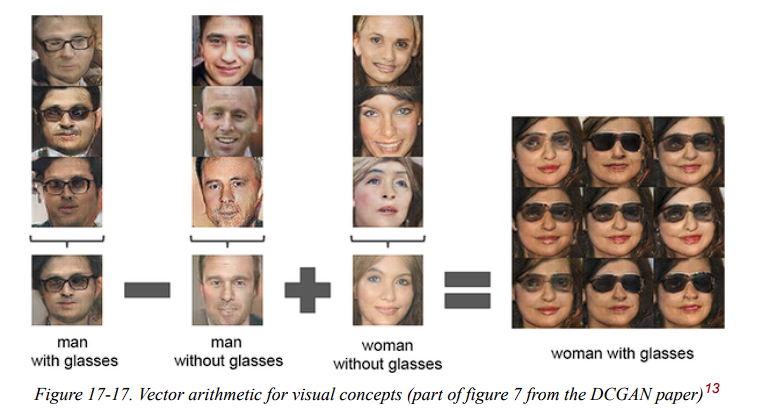

>TIP
If you add each image’s class as an extra input to both the generator and the
discriminator, they will both learn what each class looks like, and thus you will be able
to control the class of each image produced by the generator. This is called a conditional
GAN(CGAN).




### Progressive Growing of GANs

1. In a [2018 paper](https://homl.info/progan), Nvidia researchers Tero Kerras et al. proposed an
important technique: they suggested generating small images at the
beginning of training, then gradually adding convolutional layers to both
the generator and the discriminator to produce larger and larger images (4 ×
4, 8 × 8, 16 × 16, …, 512 × 512, 1,024 × 1,024).

2. This approach resembles
greedy layer-wise training of stacked autoencoders. The extra layers get
added at the end of the generator and at the beginning of the discriminator,
and previously trained layers remain trainable.

3. For example, when growing the generator’s outputs from 4 × 4 to 8 × 8 (see
Figure 17-18), an upsampling layer (using nearest neighbor filtering) is
added to the existing convolutional layer (“Conv 1”) to produce 8 × 8
feature maps. These are fed to the new convolutional layer (“Conv 2”),
which in turn feeds into a new output convolutional layer.

*  To avoid
breaking the trained weights of Conv 1, we gradually fade in the two new
convolutional layers (represented with dashed lines in Figure 17-18) and
fade out the original output layer. 

* The final outputs are a weighted sum of
the new outputs (with weight α) and the original outputs (with weight 1 –
α), slowly increasing α from 0 to 1. 

* A similar fade-in/fade-out technique is
used when a new convolutional layer is added to the discriminator
(followed by an average pooling layer for downsampling).

> Note that all
convolutional layers use "same" padding and strides of 1, so they preserve
the height and width of their inputs. This includes the original convolutional
layer, so it now produces 8 × 8 outputs (since its inputs are now 8 × 8).
Lastly, the output layers use kernel size 1. They just project their inputs
down to the desired number of color channels (typically 3).

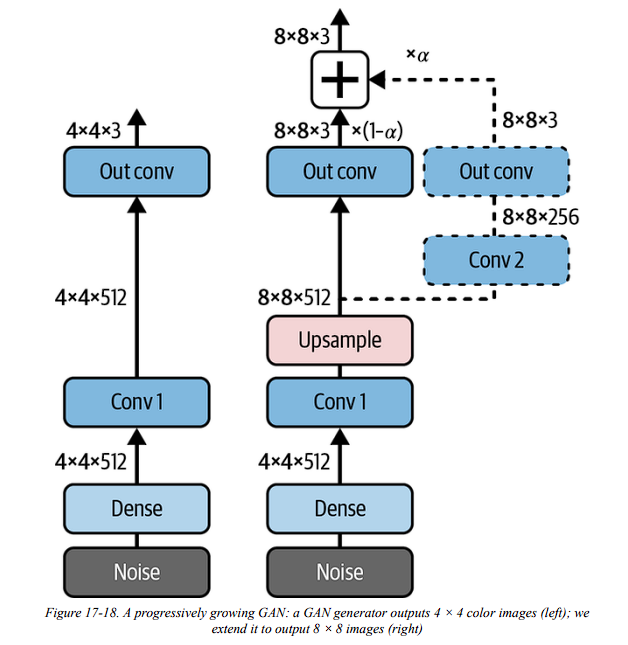

4. The paper also introduced several other techniques aimed at increasing the
diversity of the outputs (to avoid mode collapse) and making training more
stable:

* Mini-batch standard deviation layer:
Added near the end of the discriminator. For each position in the inputs,
it computes the standard deviation across all channels and all instances
in the batch (S = tf.math.reduce_std(inputs, axis=[0, -1])).
These standard deviations are then averaged across all points to get a
single value (v = tf.reduce_mean(S)). Finally, an extra feature map
is added to each instance in the batch and filled with the computed value
(tf.concat([inputs, tf.fill([batch_size, height, width,
1], v)], axis=-1)). How does this help? Well, if the generator
produces images with little variety, then there will be a small standard
deviation across feature maps in the discriminator. Thanks to this layer,
the discriminator will have easy access to this statistic, making it less
likely to be fooled by a generator that produces too little diversity. This
will encourage the generator to produce more diverse outputs, reducing
the risk of mode collapse.

* Equalized learning rate:
 Initializes all weights using a Gaussian distribution with mean 0 and
standard deviation 1 rather than using He initialization. However, the
weights are scaled down at runtime (i.e., every time the layer is
executed) by the same factor as in He initialization: they are divided by
√2/ninputs, where n is the number of inputs to the layer. The paper
demonstrated that this technique significantly improved the GAN’s
performance when using RMSProp, Adam, or other adaptive gradient
optimizers. Indeed, these optimizers normalize the gradient updates by
their estimated standard deviation (see Chapter 11), so parameters that
have a larger dynamic range will take longer to train, while
parameters with a small dynamic range may be updated too quickly,
leading to instabilities. By rescaling the weights as part of the model
itself rather than just rescaling them upon initialization, this approach
ensures that the dynamic range is the same for all parameters throughout
training, so they all learn at the same speed. This both speeds up and
stabilizes training.

* Pixelwise normalization layer:
Added after each convolutional layer in the generator. It normalizes
each activation based on all the activations in the same image and at the
same location, but across all channels (dividing by the square root of the
mean squared activation). In TensorFlow code, this is inputs /
tf.sqrt(tf.reduce_mean(tf.square(X), axis=-1,
keepdims=True) + 1e-8) (the smoothing term 1e-8 is needed to
avoid division by zero). This technique avoids explosions in the
activations due to excessive competition between the generator and the
discriminator.

The combination of all these techniques allowed the authors to generate
extremely convincing high-definition images of faces. But what exactly do
we call “convincing”? Evaluation is one of the big challenges when
working with GANs: although it is possible to automatically evaluate the
diversity of the generated images, judging their quality is a much trickier
and subjective task. One technique is to use human raters, but this is costly
and time-consuming. So, the authors proposed to measure the similarity
between the local image structure of the generated images and the training
images, considering every scale. This idea led them to another
groundbreaking innovation: StyleGANs.



### StyleGANs

1. The state of the art in high-resolution image generation was advanced once
again by the same Nvidia team in a [2018 paper](https://homl.info/stylegan) that introduced the
popular StyleGAN architecture. The authors used style transfer techniques
in the generator to ensure that the generated images have the same local
structure as the training images, at every scale, greatly improving the
quality of the generated images. The discriminator and the loss function
were not modified, only the generator. A StyleGAN generator is composed
of two networks (see Figure 17-19):

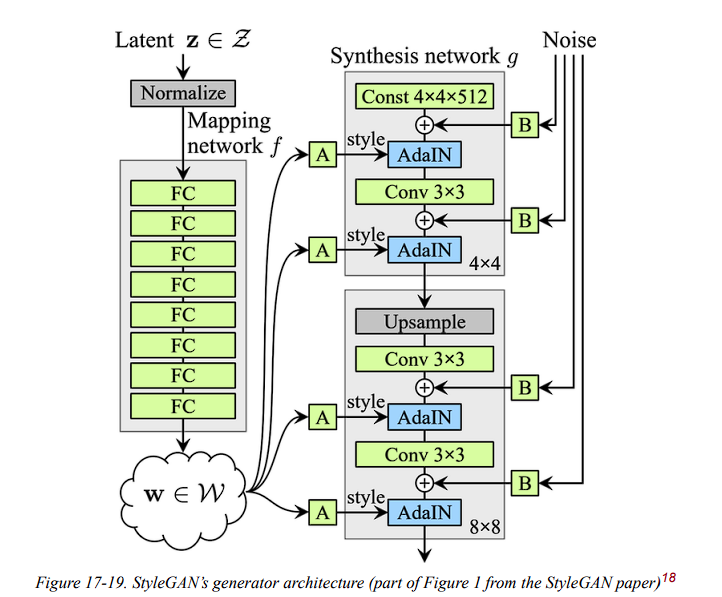

2. The idea of adding noise independently from the codings is very important.
Some parts of an image are quite random, such as the exact position of each
freckle or hair. In earlier GANs, this randomness had to either come from
the codings or be some pseudorandom noise produced by the generator
itself. If it came from the codings, it meant that the generator had to
dedicate a significant portion of the codings’ representational power to
storing noise, which this is quite wasteful.

3. Moreover, the noise had to be
able to flow through the network and reach the final layers of the generator:
this seems like an unnecessary constraint that probably slowed down
training. And finally, some visual artifacts may appear because the same
noise was used at different levels. If instead the generator tried to produce
its own pseudorandom noise, this noise might not look very convincing,
leading to more visual artifacts. Plus, part of the generator’s weights would
be dedicated to generating pseudorandom noise, which again seems
wasteful. By adding extra noise inputs, all these issues are avoided; the
GAN is able to use the provided noise to add the right amount of
stochasticity to each part of the image.

4. The added noise is different for each level. Each noise input consists of a
single feature map full of Gaussian noise, which is broadcast to all feature
maps (of the given level) and scaled using learned per-feature scaling
factors (this is represented by the “B” boxes in Figure 17-19) before it is
added.


5. Finally, StyleGAN uses a technique called mixing regularization (or style
mixing), where a percentage of the generated images are produced using
two different codings. Specifically, the codings c and c are sent through
the mapping network, giving two style vectors w and w . Then the
synthesis network generates an image based on the styles w for the first
levels and the styles w for the remaining levels. The cutoff level is picked
randomly. This prevents the network from assuming that styles at adjacent
levels are correlated, which in turn encourages locality in the GAN,
meaning that each style vector only affects a limited number of traits in the
generated image.



### Diffusion Models:

1. The
authors applied tools from thermodynamics to model a diffusion process,
similar to a drop of milk diffusing in a cup of tea. The core idea is to train a
model to learn the reverse process: start from the completely mixed state,
and gradually “unmix” the milk from the tea. Using this idea, they obtained
promising results in image generation, but since GANs produced more
convincing images back then, diffusion models did not get as much
attention.

2. Then, in 2020, Jonathan Ho et al., also from UC Berkeley, managed to build
a diffusion model capable of generating highly realistic images, which they
called a denoising diffusion probabilistic model (DDPM). A few months
later, a  [2021 paper](https://homl.info/ddpm2) by OpenAI researchers Alex Nichol and Prafulla
Dhariwal analyzed the DDPM architecture and proposed several
improvements that allowed DDPMs to finally beat GANs: not only are
DDPMs much easier to train than GANs, but the generated images are more
diverse and of even higher quality. The main downside of DDPMs, as you
will see, is that they take a very long time to generate images, compared to
GANs or VAEs.

3. how exactly does a DDPM work?

* Well, suppose you start with a picture
of a cat (like the one you’ll see in Figure 17-20), noted x_0 , and at each time
step t you add a little bit of Gaussian noise to the image, with mean 0 and
variance β_1 . This noise is independent for each pixel: we call it isotropic.

* You first obtain the image x_1 , then x_2 , and so on, until the cat is completely
hidden by the noise, impossible to see. The last time step is noted T. In the
original DDPM paper, the authors used T = 1,000, and they scheduled the
variance β_1 in such a way that the cat signal fades linearly between time
steps 0 and T.

* In the improved DDPM paper, T was bumped up to 4,000,
and the variance schedule was tweaked to change more slowly at the
beginning and at the end. In short, we’re gradually drowning the cat in
noise: this is called the forward process.


* As we add more and more Gaussian noise in the forward process, the
distribution of pixel values becomes more and more Gaussian. One
important detail I left out is that the pixel values get rescaled slightly at
each step, by a factor of √1 − βt
. This ensures that the mean of the pixel
values gradually approaches 0, since the scaling factor is a bit smaller than
1 (imagine repeatedly multiplying a number by 0.99). It also ensures that
the variance will gradually converge to 1.

* This is because the standard
deviation of the pixel values also gets scaled by √1 − βt
, so the variance
gets scaled by 1 – β_1 (i.e., the square of the scaling factor). But the variance
cannot shrink to 0 since we’re adding Gaussian noise with variance β_1 at
each step. And since variances add up when you sum Gaussian
distributions, you can see that the variance can only converge to 1 – β_1 + β_1
= 1.

* The forward diffusion process is summarized in Equation 17-5. This
equation won’t teach you anything new about the forward process, but it’s
useful to understand this type of mathematical notation, as it’s often used in
ML papers. This equation defines the probability distribution q of x_t given
x_(t-1) as a Gaussian distribution with mean x_(t-1) times the scaling factor, and
with a covariance matrix equal to β_t I. This is the identity matrix I multiplied
by β_t , which means that the noise is isotropic with variance β_t .

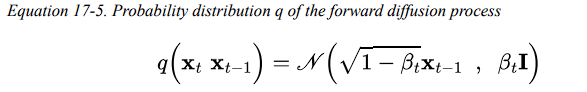


* Interestingly, there’s a shortcut for the forward process: it’s possible to
sample an image x_t given x_0 without having to first compute x_1 , x_2 , …, x_(t-1) .
Indeed, since the sum of multiple Gaussian distributions is also a Gaussian
distribution, all the noise can be added in just one shot using Equation 17-6.
This is the equation we will be using, as it is much faster.

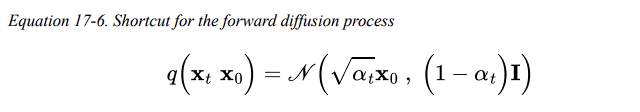

* Our goal, of course, is not to drown cats in noise. On the contrary, we want
to create many new cats! We can do so by training a model that can perform
the reverse process: going from x to x . We can then use it to remove a
tiny bit of noise from an image, and repeat the operation many times until
all the noise is gone. If we train the model on a dataset containing many cat
images, then we can give it a picture entirely full of Gaussian noise, and the
model will gradually make a brand new cat appear (see Figure 17-20).

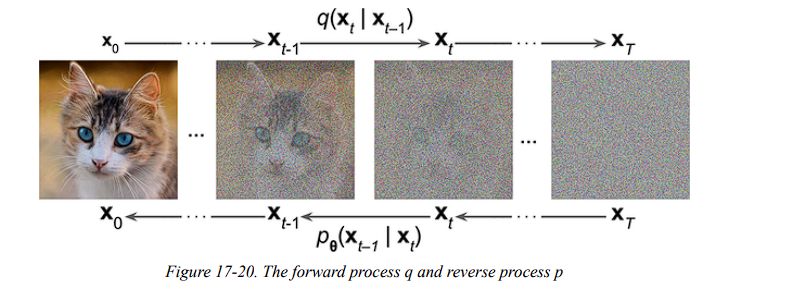

4. The first thing we need to do is to code the
forward process. For this, we will first need to implement the variance
schedule. How can we control how fast the cat disappears? Initially, 100%
of the variance comes from the original cat image. Then at each time step t,
the variance gets multiplied by 1 – β_t , as explained earlier, and noise gets
added. So, the part of the variance that comes from the initial distribution
shrinks by a factor of 1 – β_t at each step. If we define α_t = 1 – β_t , then after t
time steps, the cat signal will have been multiplied by a factor of α_t =
α_1 ×α_2 ×…×α_t = α_t = ∏(^t) _(i=1) α_t
. It’s this “cat signal” factor that we want to
schedule so it shrinks down from 1 to 0 gradually between time steps 0 and
T. In the improved DDPM paper, the authors schedule according to
Equation 17-7. This schedule is represented in Figure 17-21.

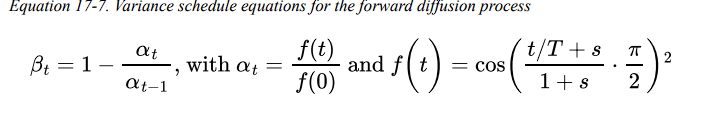

In these equations:
* s is a tiny value which prevents β_t from being too small near t = 0. In
the paper, the authors used s = 0.008.

* β_t is clipped to be no larger than 0.999, to avoid instabilities near t = T. 






Let’s create a small function to compute α , β , and , and call it with T =
4,000:

In [ ]:
def variance_schedule(T, s=0.008, max_beta=0.999):
    t = np.arange(T + 1)
    f = np.cos((t / T + s) / (1 + s) * np.pi / 2) ** 2
    alpha = np.clip(f[1:] / f[:-1], 1 - max_beta, 1)
    alpha = np.append(1, alpha).astype(np.float32)  # add α₀ = 1
    beta = 1 - alpha
    alpha_cumprod = np.cumprod(alpha)
    return alpha, alpha_cumprod, beta  # αₜ , α̅ₜ , βₜ for t = 0 to T

np.random.seed(42)  # extra code – for reproducibility
T = 4000
alpha, alpha_cumprod, beta = variance_schedule(T)

In [ ]:
# extra code – this cell generates and saves Figure 17–21
plt.figure(figsize=(6, 3))
plt.plot(beta, "r--", label=r"$\beta_t$")
plt.plot(alpha_cumprod, "b", label=r"$\bar{\alpha}_t$")
plt.axis([0, T, 0, 1])
plt.grid(True)
plt.xlabel(r"t")
plt.legend()
plt.show()

To train our model to reverse the diffusion process, we will need noisy
images from different time steps of the forward process. For this, let’s
create a prepare_batch() function that will take a batch of clean images
from the dataset and prepare them:

In [ ]:
def prepare_batch(X):
    X = tf.cast(X[..., tf.newaxis], tf.float32) * 2 - 1  # scale from –1 to +1
    X_shape = tf.shape(X)
    t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
    alpha_cm = tf.gather(alpha_cumprod, t)
    alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
    noise = tf.random.normal(X_shape)
    return {
        "X_noisy": alpha_cm ** 0.5 * X + (1 - alpha_cm) ** 0.5 * noise,
        "time": t,
    }, noise

Let’s go through this code:
* For simplicity we will use Fashion MNIST, so the function must first
add a channel axis. It will also help to scale the pixel values from –1 to
1, so it’s closer to the final Gaussian distribution with mean 0 and
variance 1.

* Next, the function creates t, a vector containing a random time step for
each image in the batch, between 1 and T.

* Then it uses tf.gather() to get the value of alpha_cumprod for each
of the time steps in the vector t. This gives us the vector alpha_cm,
containing one value of for each image.

* The next line reshapes the alpha_cm from [batch size] to [batch size,
1, 1, 1]. This is needed to ensure alpha_cm can be broadcasted with
the batch X.

* Then we generate some Gaussian noise with mean 0 and variance 1.

* Lastly, we use Equation 17-6 to apply the diffusion process to the
images. Note that x ** 0.5 is equal to the square root of x. The
function returns a tuple containing the inputs and the targets. The
inputs are represented as a Python dict containing the noisy images
and the time steps used to generate them. The targets are the Gaussian
noise used to generate each image.

>NOTE
With this setup, the model will predict the noise that should be subtracted from the input
image to get the original image. Why not predict the original image directly? Well, the
authors tried: it simply doesn’t work as well.




Next, we’ll create a training dataset and a validation set that will apply the
prepare_batch() function to every batch. As earlier, X_train and
X_valid contain the Fashion MNIST images with pixel values ranging
from 0 to 1:

In [ ]:
def prepare_dataset(X, batch_size=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices(X)
    if shuffle:
        ds = ds.shuffle(10_000)
    return ds.batch(batch_size).map(prepare_batch).prefetch(1)

tf.random.set_seed(43)  # extra code – ensures reproducibility on CPU
train_set = prepare_dataset(X_train, batch_size=32, shuffle=True)
valid_set = prepare_dataset(X_valid, batch_size=32)

In [ ]:
# extra code – just a quick sanity check

def subtract_noise(X_noisy, time, noise):
    X_shape = tf.shape(X_noisy)
    alpha_cm = tf.gather(alpha_cumprod, time)
    alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
    return (X_noisy - (1 - alpha_cm) ** 0.5 * noise) / alpha_cm ** 0.5

X_dict, Y_noise = list(train_set.take(1))[0]  # get the first batch
X_original = subtract_noise(X_dict["X_noisy"], X_dict["time"], Y_noise)

print("Original images")
plot_multiple_images(X_original[:8].numpy())
plt.show()
print("Time steps:", X_dict["time"].numpy()[:8])
print("Noisy images")
plot_multiple_images(X_dict["X_noisy"][:8].numpy())
plt.show()
print("Noise to predict")
plot_multiple_images(Y_noise[:8].numpy())
plt.show()

Now we’re ready to build the actual diffusion model itself. It can be any
model you want, as long as it takes the noisy images and time steps as
inputs, and predicts the noise to subtract from the input images:


In [125]:
# extra code – implements a custom time encoding layer

embed_size = 64

class TimeEncoding(tf.keras.layers.Layer):
    def __init__(self, T, embed_size, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        assert embed_size % 2 == 0, "embed_size must be even"
        p, i = np.meshgrid(np.arange(T + 1), 2 * np.arange(embed_size // 2))
        t_emb = np.empty((T + 1, embed_size))
        t_emb[:, ::2] = np.sin(p / 10_000 ** (i / embed_size)).T
        t_emb[:, 1::2] = np.cos(p / 10_000 ** (i / embed_size)).T
        self.time_encodings = tf.constant(t_emb.astype(self.dtype))

    def call(self, inputs):
        return tf.gather(self.time_encodings, inputs)

In [ ]:
def build_diffusion_model():
    X_noisy = tf.keras.layers.Input(shape=[28, 28, 1], name="X_noisy")
    time_input = tf.keras.layers.Input(shape=[], dtype=tf.int32, name="time")
    time_enc = TimeEncoding(T, embed_size)(time_input)

    dim = 16
    Z = tf.keras.layers.ZeroPadding2D((3, 3))(X_noisy)
    Z = tf.keras.layers.Conv2D(dim, 3)(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)
    Z = tf.keras.layers.Activation("relu")(Z)

    time = tf.keras.layers.Dense(dim)(time_enc)  # adapt time encoding
    Z = time[:, tf.newaxis, tf.newaxis, :] + Z  # add time data to every pixel

    skip = Z
    cross_skips = []  # skip connections across the down & up parts of the UNet

    for dim in (32, 64, 128):
        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        cross_skips.append(Z)
        Z = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(Z)
        skip_link = tf.keras.layers.Conv2D(dim, 1, strides=2,
                                           padding="same")(skip)
        Z = tf.keras.layers.add([Z, skip_link])

        time = tf.keras.layers.Dense(dim)(time_enc)
        Z = time[:, tf.newaxis, tf.newaxis, :] + Z
        skip = Z

    for dim in (64, 32, 16):
        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.UpSampling2D(2)(Z)

        skip_link = tf.keras.layers.UpSampling2D(2)(skip)
        skip_link = tf.keras.layers.Conv2D(dim, 1, padding="same")(skip_link)
        Z = tf.keras.layers.add([Z, skip_link])

        time = tf.keras.layers.Dense(dim)(time_enc)
        Z = time[:, tf.newaxis, tf.newaxis, :] + Z
        Z = tf.keras.layers.concatenate([Z, cross_skips.pop()], axis=-1)
        skip = Z

    outputs = tf.keras.layers.Conv2D(1, 3, padding="same")(Z)[:, 2:-2, 2:-2]
    return tf.keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])

In [ ]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on the CPU
model = build_diffusion_model()
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Nadam())

# extra code – adds a ModelCheckpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_diffusion_model",
                                                   save_best_only=True)

history = model.fit(train_set, validation_data=valid_set, epochs=100,
                    callbacks=[checkpoint_cb])  # extra code

* Once the model is trained, you can use it to generate new images.
Unfortunately, there’s no shortcut in the reverse diffusion process, so you
have to sample x_T randomly from a Gaussian distribution with mean 0 and
variance 1, then pass it to the model to predict the noise; subtract it from the
image using Equation 17-8, and you get x_(T-1) . Repeat the process 3,999
more times until you get x_0 : if all went well, it should look like a regular
Fashion MNIST image!

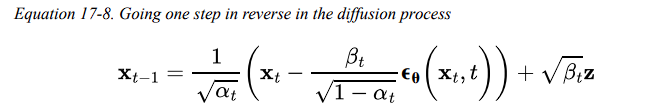

In this equation, ϵ_θ (x_t , t) represents the noise predicted by the model given
the input image x_t and the time step t. The θ represents the model
parameters. Moreover, z is Gaussian noise with mean 0 and variance 1. This
makes the reverse process stochastic: if you run it multiple times, you will
get different images.


Let’s write a function that implements this reverse process, and call it to
generate a few images:

In [ ]:
def generate(model, batch_size=32):
    X = tf.random.normal([batch_size, 28, 28, 1])
    for t in range(T - 1, 0, -1):
        print(f"\rt = {t}", end=" ")  # extra code – show progress
        noise = (tf.random.normal if t > 1 else tf.zeros)(tf.shape(X))
        X_noise = model({"X_noisy": X, "time": tf.constant([t] * batch_size)})
        X = (
            1 / alpha[t] ** 0.5
            * (X - beta[t] / (1 - alpha_cumprod[t]) ** 0.5 * X_noise)
            + (1 - alpha[t]) ** 0.5 * noise
        )
    return X

tf.random.set_seed(42)  # extra code – ensures reproducibility on the CPU
X_gen = generate(model)  # generated images

This may take a minute or two. That’s the main drawback of diffusion
models: generating images is slow since the model needs to be called many
times. It’s possible to make this faster by using a smaller T value, or by
using the same model prediction for several steps at a time, but the resulting
images may not look as nice. That said, despite this speed limitation,
diffusion models do produce high-quality and diverse images,

In [ ]:
plot_multiple_images(X_gen.numpy(), 8)
save_fig("ddpm_generated_images_plot")
plt.show()

### Latent Diffusion Model

1. diffusion process takes place in latent space, rather than in pixel space. To achieve this, a
powerful autoencoder is used to compress each training image into a much
smaller latent space, where the diffusion process takes place, then the
autoencoder is used to decompress the final latent representation,
generating the output image. This considerably speeds up image generation,
and reduces training time and cost dramatically. Importantly, the quality of
the generated images is outstanding.

2. Moreover, the researchers also adapted various conditioning techniques to
guide the diffusion process using text prompts, images, or any other inputs.
This makes it possible to quickly produce a beautiful, high-resolution image
of a salamander reading a book, or anything else you might fancy. You can
also condition the image generation process using an input image. This
enables many applications, such as outpainting—where an input image is
extended beyond its borders—or inpainting—where holes in an image are
filled in.


### Hashing Using a binary autoencoder

Let's train an autoencoder where the encoder has a 16-neuron output layer, using the sigmoid activation function, and heavy Gaussian noise just before it. During training, the noise layer will encourage the previous layer to output large values, since small values will just be crushed by the noise. In turn, this means that the output layer will output values close to 0 or 1, thanks to the sigmoid activation function. Once we round the output values to 0s and 1s, we get a 16-bit "semantic" hash. If everything works well, images that look alike will have the same hash. This can be very useful for search engines: for example, if we store each image on a server identified by the image's semantic hash, then all similar images will end up on the same server. Users of the search engine can then provide an image to search for, and the search engine will compute the image's hash using the encoder, and quickly return all the images on the server identified by that hash. 

In [ ]:
tf.random.set_seed(42)

hashing_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.GaussianNoise(15.),
    tf.keras.layers.Dense(16, activation="sigmoid"),
])
hashing_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
hashing_ae = tf.keras.Sequential([hashing_encoder, hashing_decoder])
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
hashing_ae.compile(loss="mse", optimizer)
history = hashing_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

The autoencoder compresses the information so much (down to 16 bits!) that it's quite lossy, but that's okay, we're using it to produce semantic hashes, not to perfectly reconstruct the ima

In [ ]:
plot_reconstructions(hashing_ae)
plt.show()

Now let's see what the hashes look like for the first few images in the validation set:

In [ ]:
hashes = hashing_encoder.predict(X_valid).round().astype(np.int32)
hashes *= np.array([[2 ** bit for bit in range(16)]])
hashes = hashes.sum(axis=1)
for h in hashes[:5]:
    print(f"{h:016b}")
print("...")

Now let's find the most common image hashes in the validation set, and display a few images for each hash. In the following image, all the images on a given row have the same hash:

In [ ]:
from collections import Counter

n_hashes = 10
n_images = 8

top_hashes = Counter(hashes).most_common(n_hashes)

plt.figure(figsize=(n_images, n_hashes))
for hash_index, (image_hash, hash_count) in enumerate(top_hashes):
    indices = (hashes == image_hash)
    for index, image in enumerate(X_valid[indices][:n_images]):
        plt.subplot(n_hashes, n_images, hash_index * n_images + index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

plt.show()